# 🌟 "Customer churn prediction in telecom sector using machine learning techniques"

# <font color='blue'>1. Introduction :</font>
📌 **Goal**:
This notebook applies various machine learning techniques to predict customer churn based on a dataset.

Churn prediction identifies customers likely to leave a service, enabling companies to take proactive retention measures.
This notebook implements the steps from Paper 1, using the churn-bigml-80.csv dataset.
Key steps:
- Data Cleaning
- Feature Selection

### **Algorithms Used:**
- Decision Tree Classifier
- Random Forest Classifier
- Survival Analysis (Kaplan-Meier)
- SMOTE for Handling Imbalanced Data

### **Datasets:**
- `churn-bigml-80.csv` (Training)
- `churn-bigml-20.csv` (Testing)
- Evaluation Metrics: Accuracy, Precision, Recall, F1-score, and ROC-AUC


# 📊 <font color='green'>2. Data Understanding :</font>
We'll load the dataset `churn-bigml-80.csv` and explore its structure, missing values, and statistics.


In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [153]:
train_data = pd.read_csv('churn-bigml-80.csv')  # Training dataset
test_data = pd.read_csv('churn-bigml-20.csv')   # Testing dataset

Result Explanation:

Dataset Shape: Displays the number of rows and columns (e.g., (3,333, 20)).
data.head(): Shows the first five rows of the dataset.
data.info(): Lists column names, data types (numeric, object, etc.), and missing values in the dataset.
data.describe(): Provides summary statistics for numeric columns (mean, min, max, etc.).

In [154]:
# Preview the training data
print("🔍 First 5 rows of Training Data:")
train_data.head()

🔍 First 5 rows of Training Data:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [155]:
# Check data types and missing values for the training dataset
print("\nTraining Data Information:")
train_data.info()

print("\nSummary Statistics (Training Data):")
train_data.describe()


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


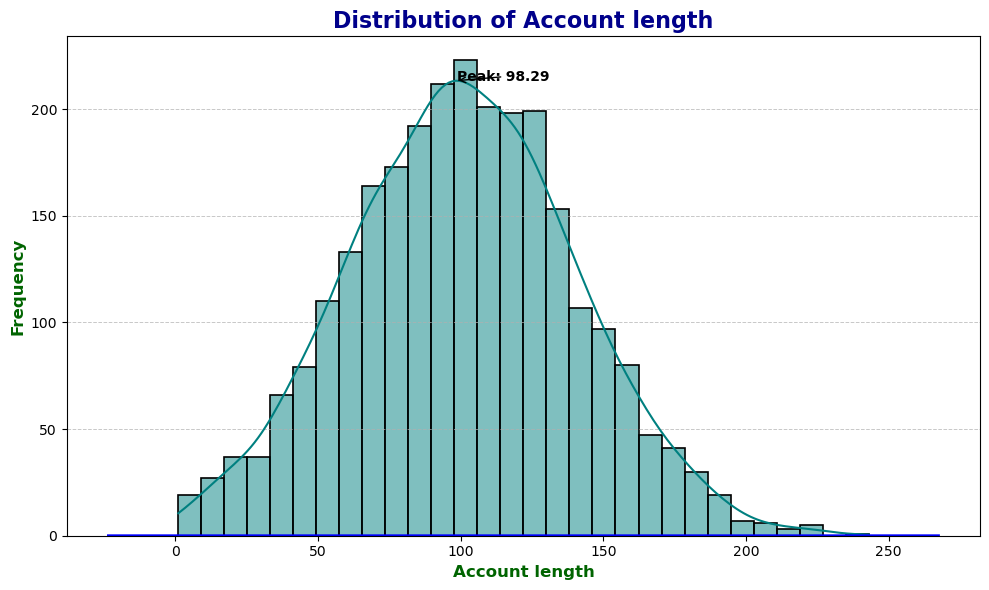

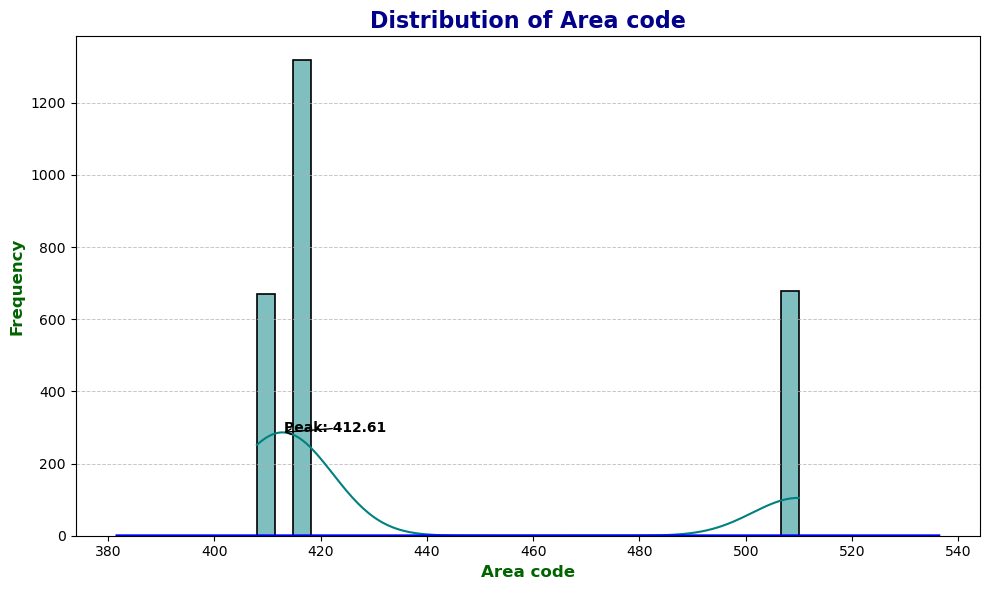

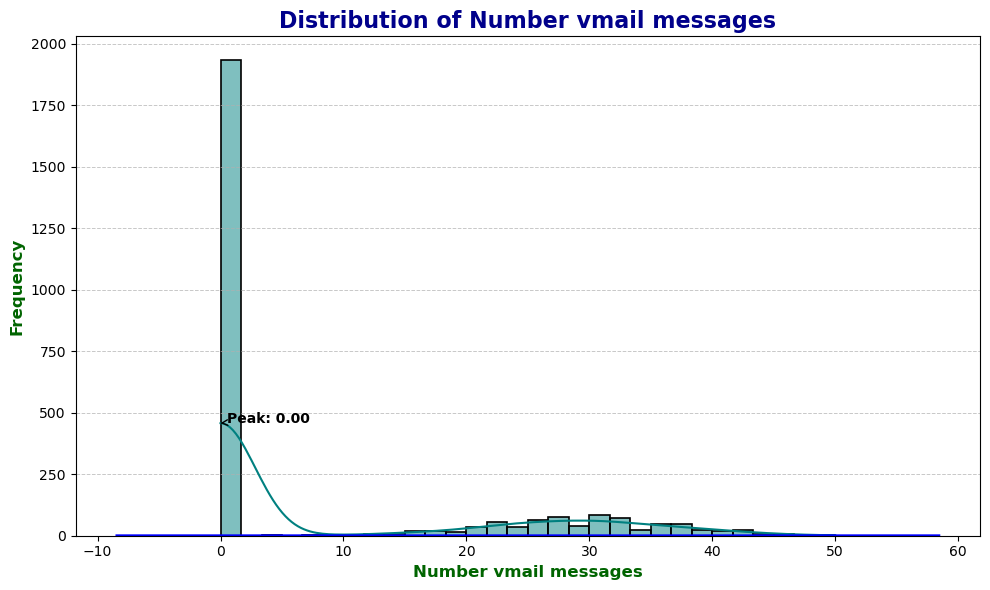

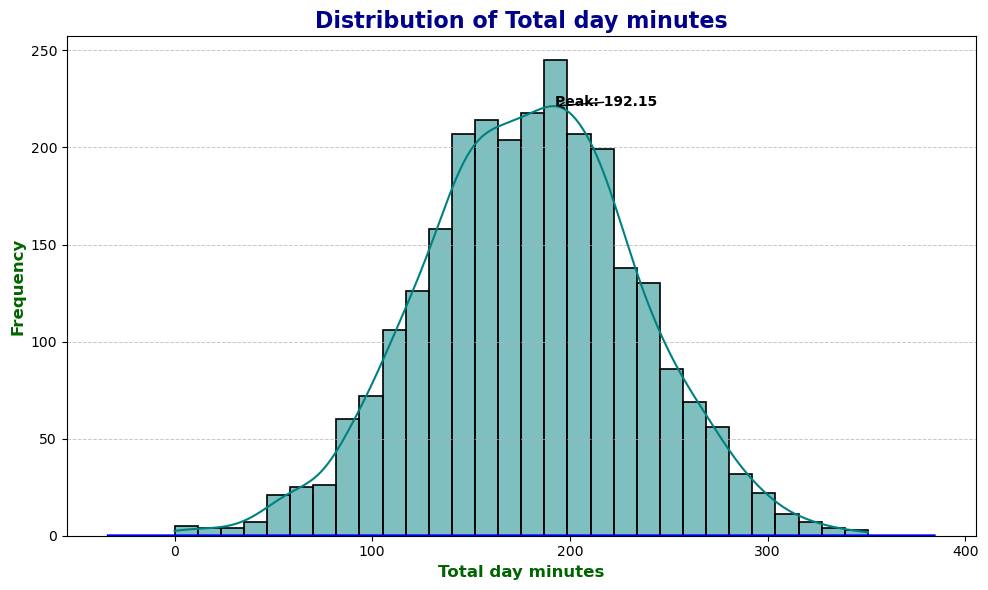

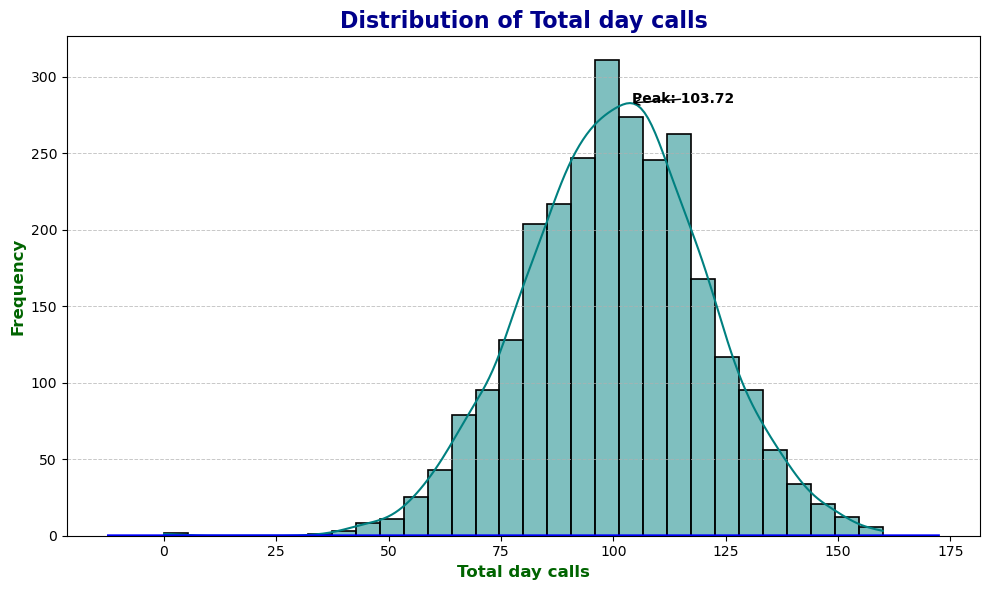

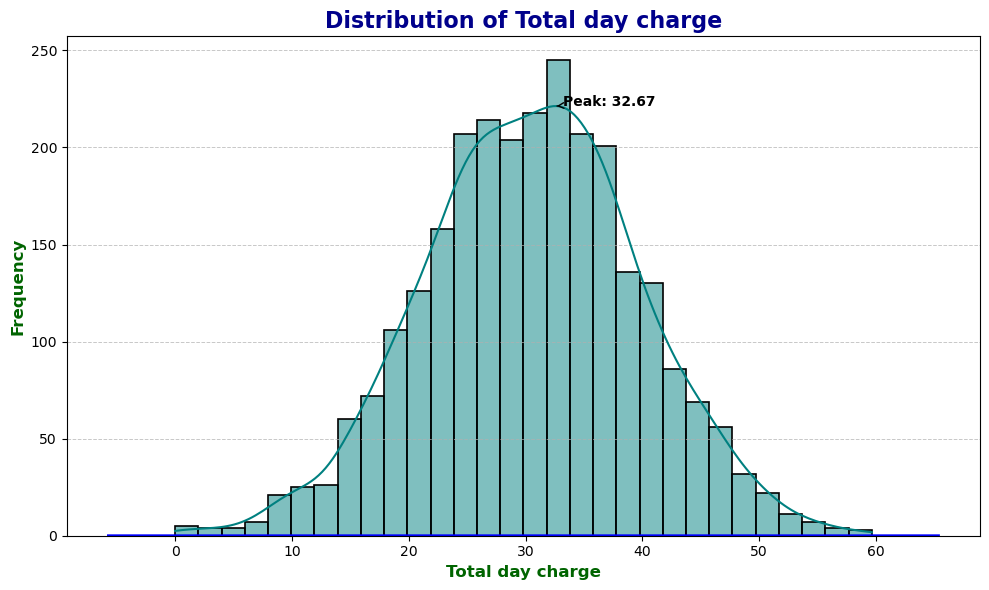

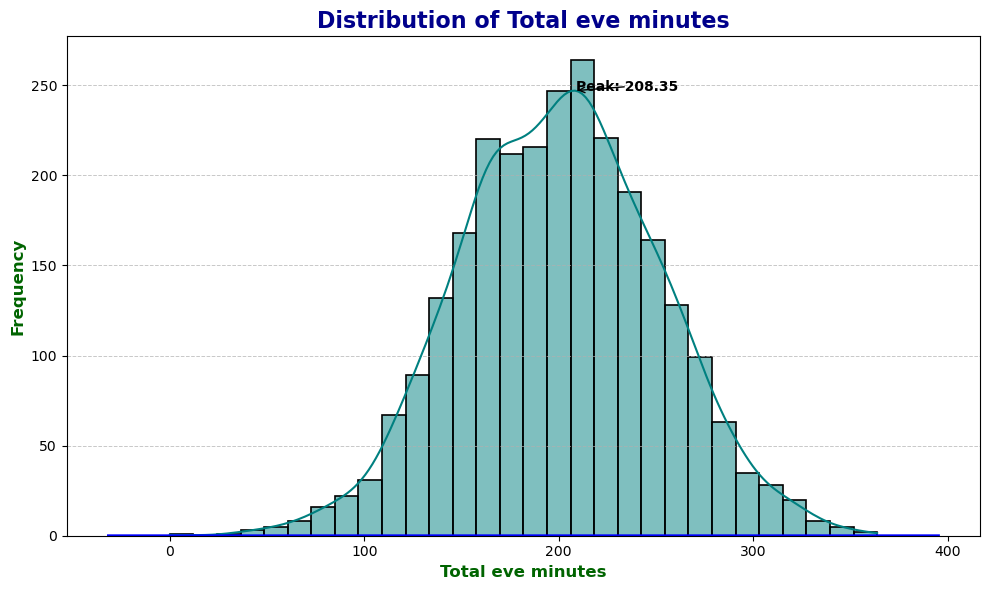

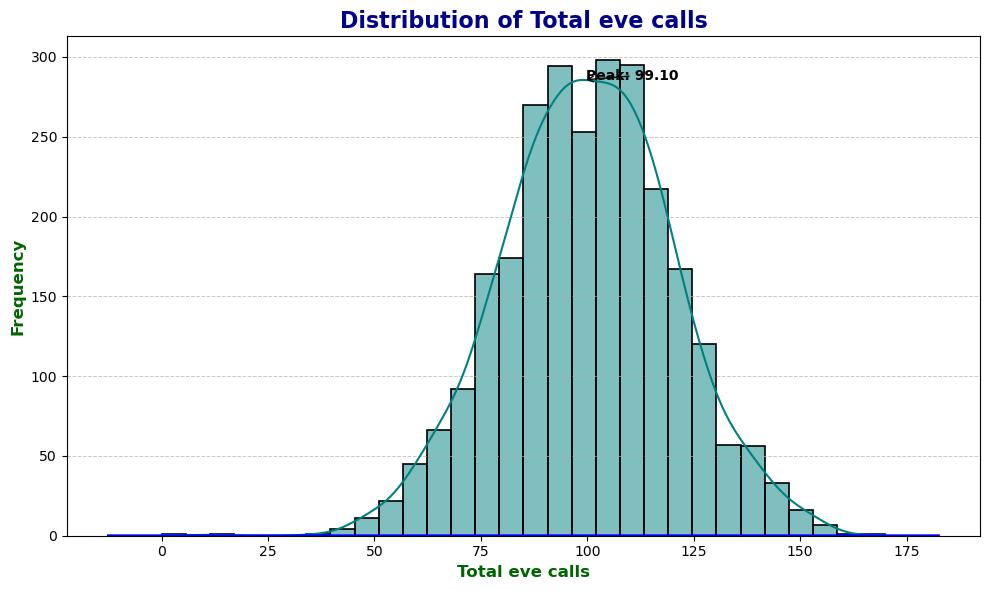

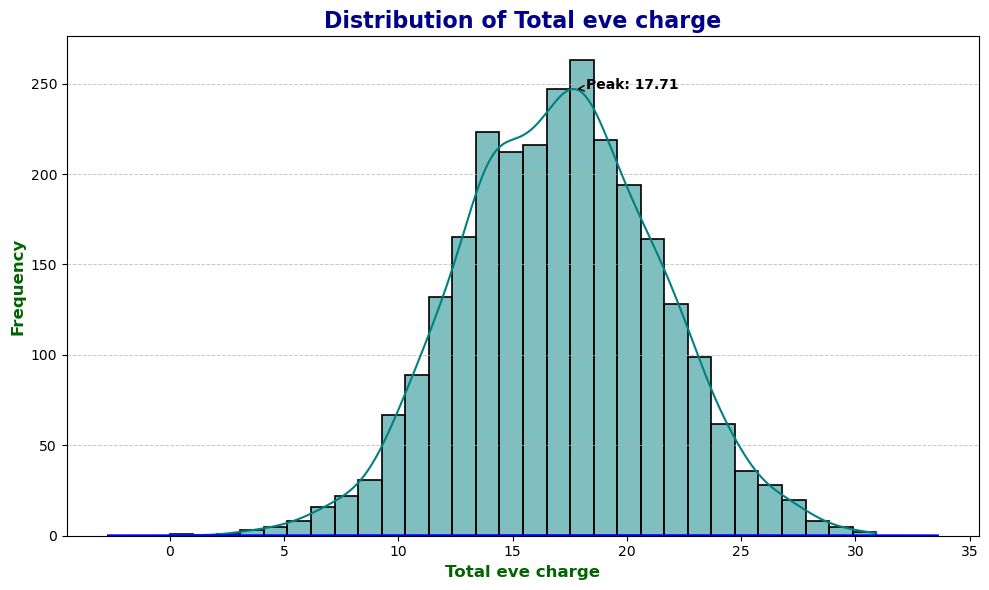

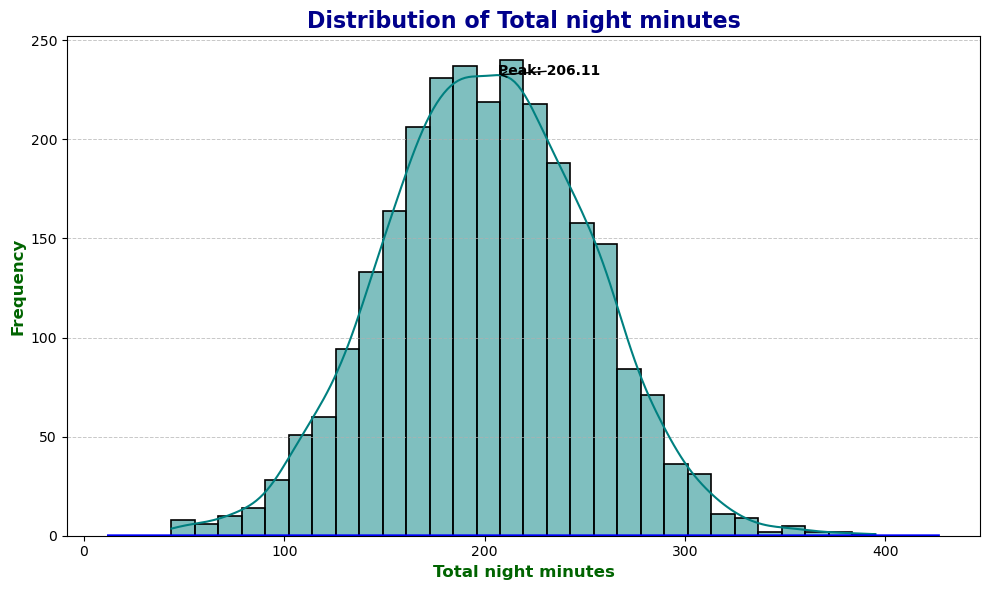

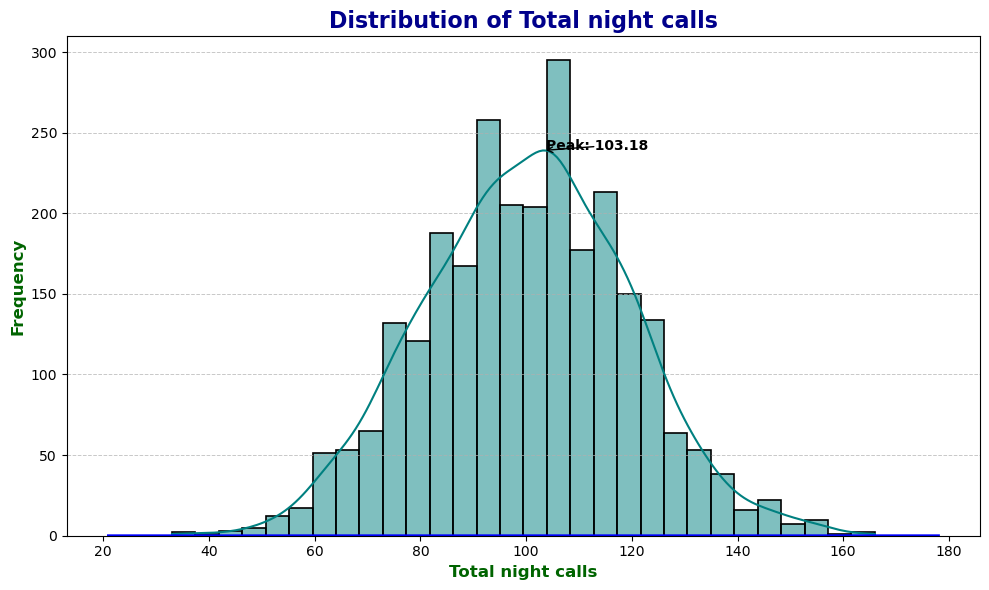

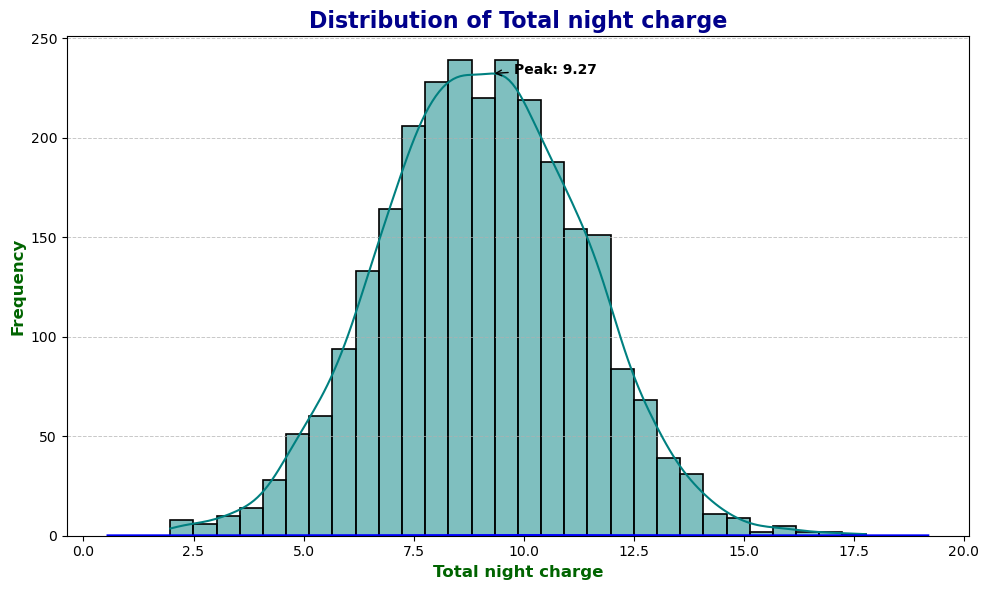

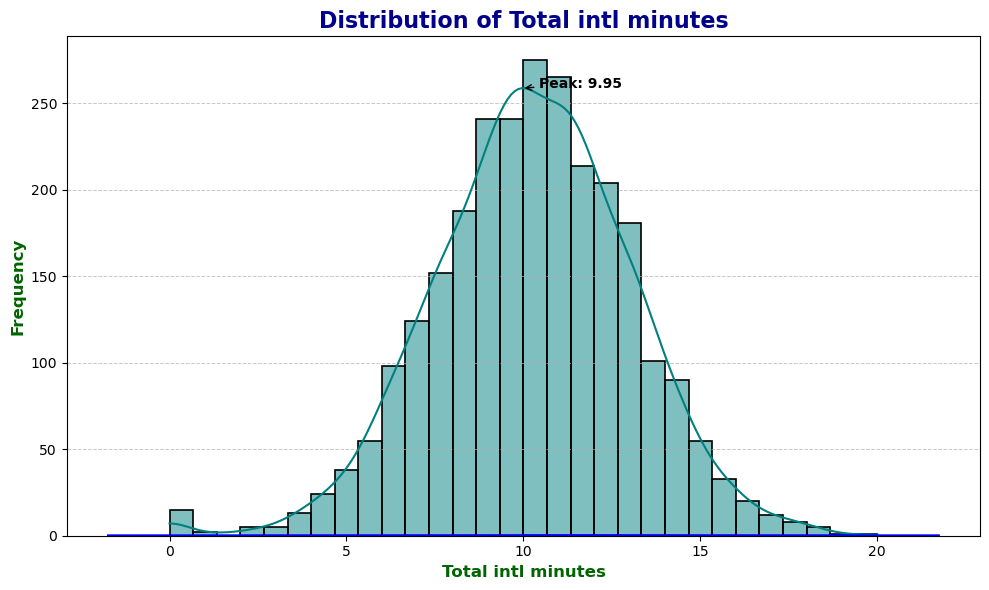

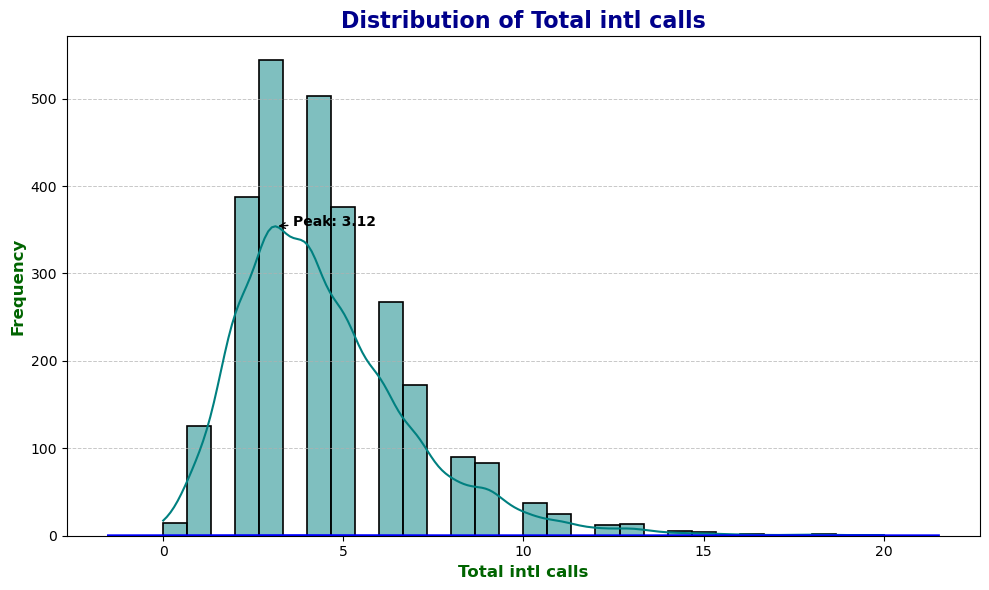

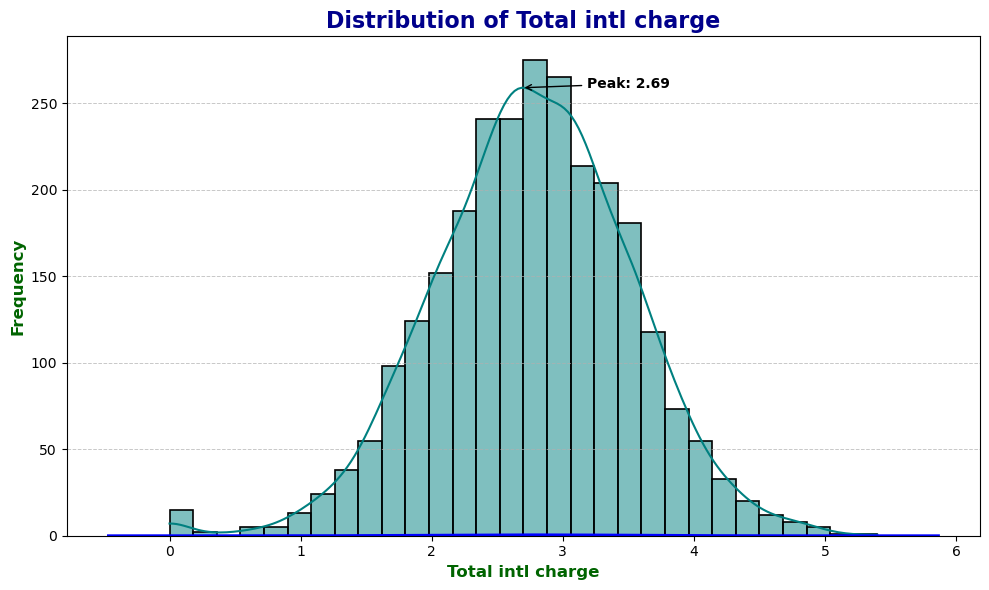

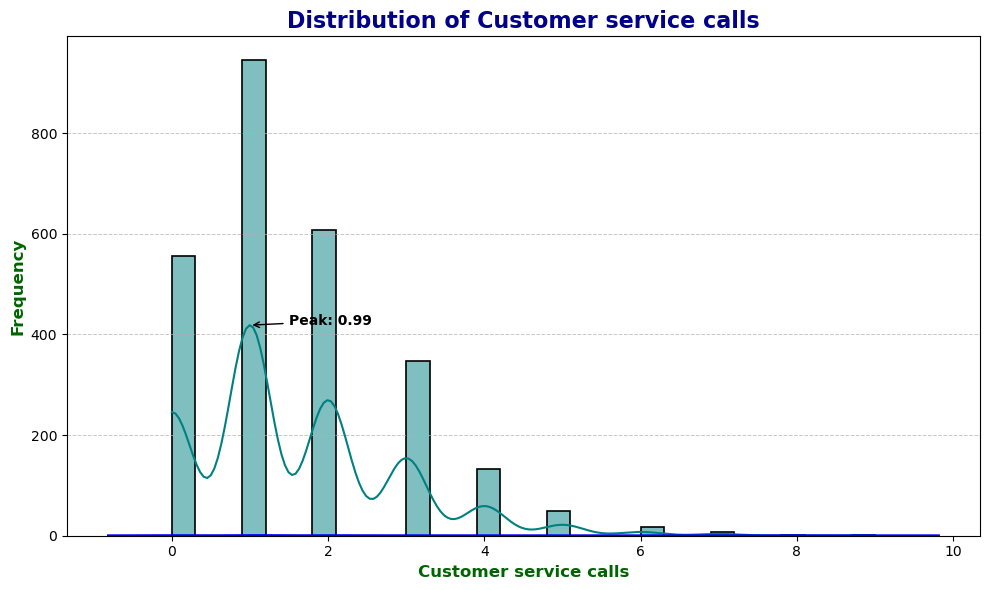

In [156]:
# Identify numerical columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Enhanced plots for numerical features in the training dataset
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create histogram with KDE and enhanced aesthetics
    sns.histplot(train_data[col], kde=True, color="teal", edgecolor="black", linewidth=1.2, bins=30)
    
    # Add title and axis labels with improved formatting
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=12, fontweight='bold', color='darkgreen')
    plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkgreen')
    
    # Customize grid and background
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    
    # Add annotations for peak values (max density point in KDE)
    if train_data[col].notnull().any():  # Ensure the column is not empty
        kde_ax = sns.kdeplot(train_data[col], color="blue", linewidth=2)
        max_density = kde_ax.lines[0].get_data()[1].max()  # Find max y-value (density)
        max_x = kde_ax.lines[0].get_data()[0][kde_ax.lines[0].get_data()[1].argmax()]  # Corresponding x-value
        plt.annotate(f"Peak: {max_x:.2f}", xy=(max_x, max_density), xytext=(max_x + 0.5, max_density + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, color="black", fontweight="bold")
    
    # Adjust layout to avoid clipping
    plt.tight_layout()
    plt.show()


In [157]:
# =====================================
# 🔴 5. Identify Non-Numeric Columns
# =====================================
categorical_cols = train_data.columns[train_data.dtypes == object].tolist()
print('Categorical columns:', categorical_cols)
print('Number of categorical columns:', len(categorical_cols))
print('Modalities in categorical columns:', train_data[categorical_cols].nunique())

numerical_cols = train_data.columns[train_data.dtypes != object].tolist()
print('Numerical columns:', numerical_cols)
print('Number of numerical columns:', len(numerical_cols))


Categorical columns: ['State', 'International plan', 'Voice mail plan']
Number of categorical columns: 3
Modalities in categorical columns: State                 51
International plan     2
Voice mail plan        2
dtype: int64
Numerical columns: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Number of numerical columns: 17


In [158]:
print(f"Missing values:\n{train_data.isnull().sum()}")

Missing values:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [159]:
print("\nNombre de lignes et colonnes avant suppression des doublons :")
print(train_data.shape)
# Suppression des colonnes dupliquées (basées sur les noms ou les valeurs identiques)
# Si une colonne a les mêmes valeurs pour toutes les lignes, elle peut être supprimée
train_data = train_data.loc[:, ~train_data.columns.duplicated()]  # Supprimer les colonnes dupliquées par nom

# Vérification des colonnes identiques (basé sur les valeurs)
train_data = train_data.loc[:, ~train_data.T.duplicated()]  # Supprimer les colonnes avec des valeurs identiques

# Suppression des lignes dupliquées
train_data= train_data.drop_duplicates()

# Vérification après suppression
print("\nNombre de lignes et colonnes après suppression des doublons :")
print(train_data.shape)


Nombre de lignes et colonnes avant suppression des doublons :
(2666, 20)



Nombre de lignes et colonnes après suppression des doublons :
(2666, 20)


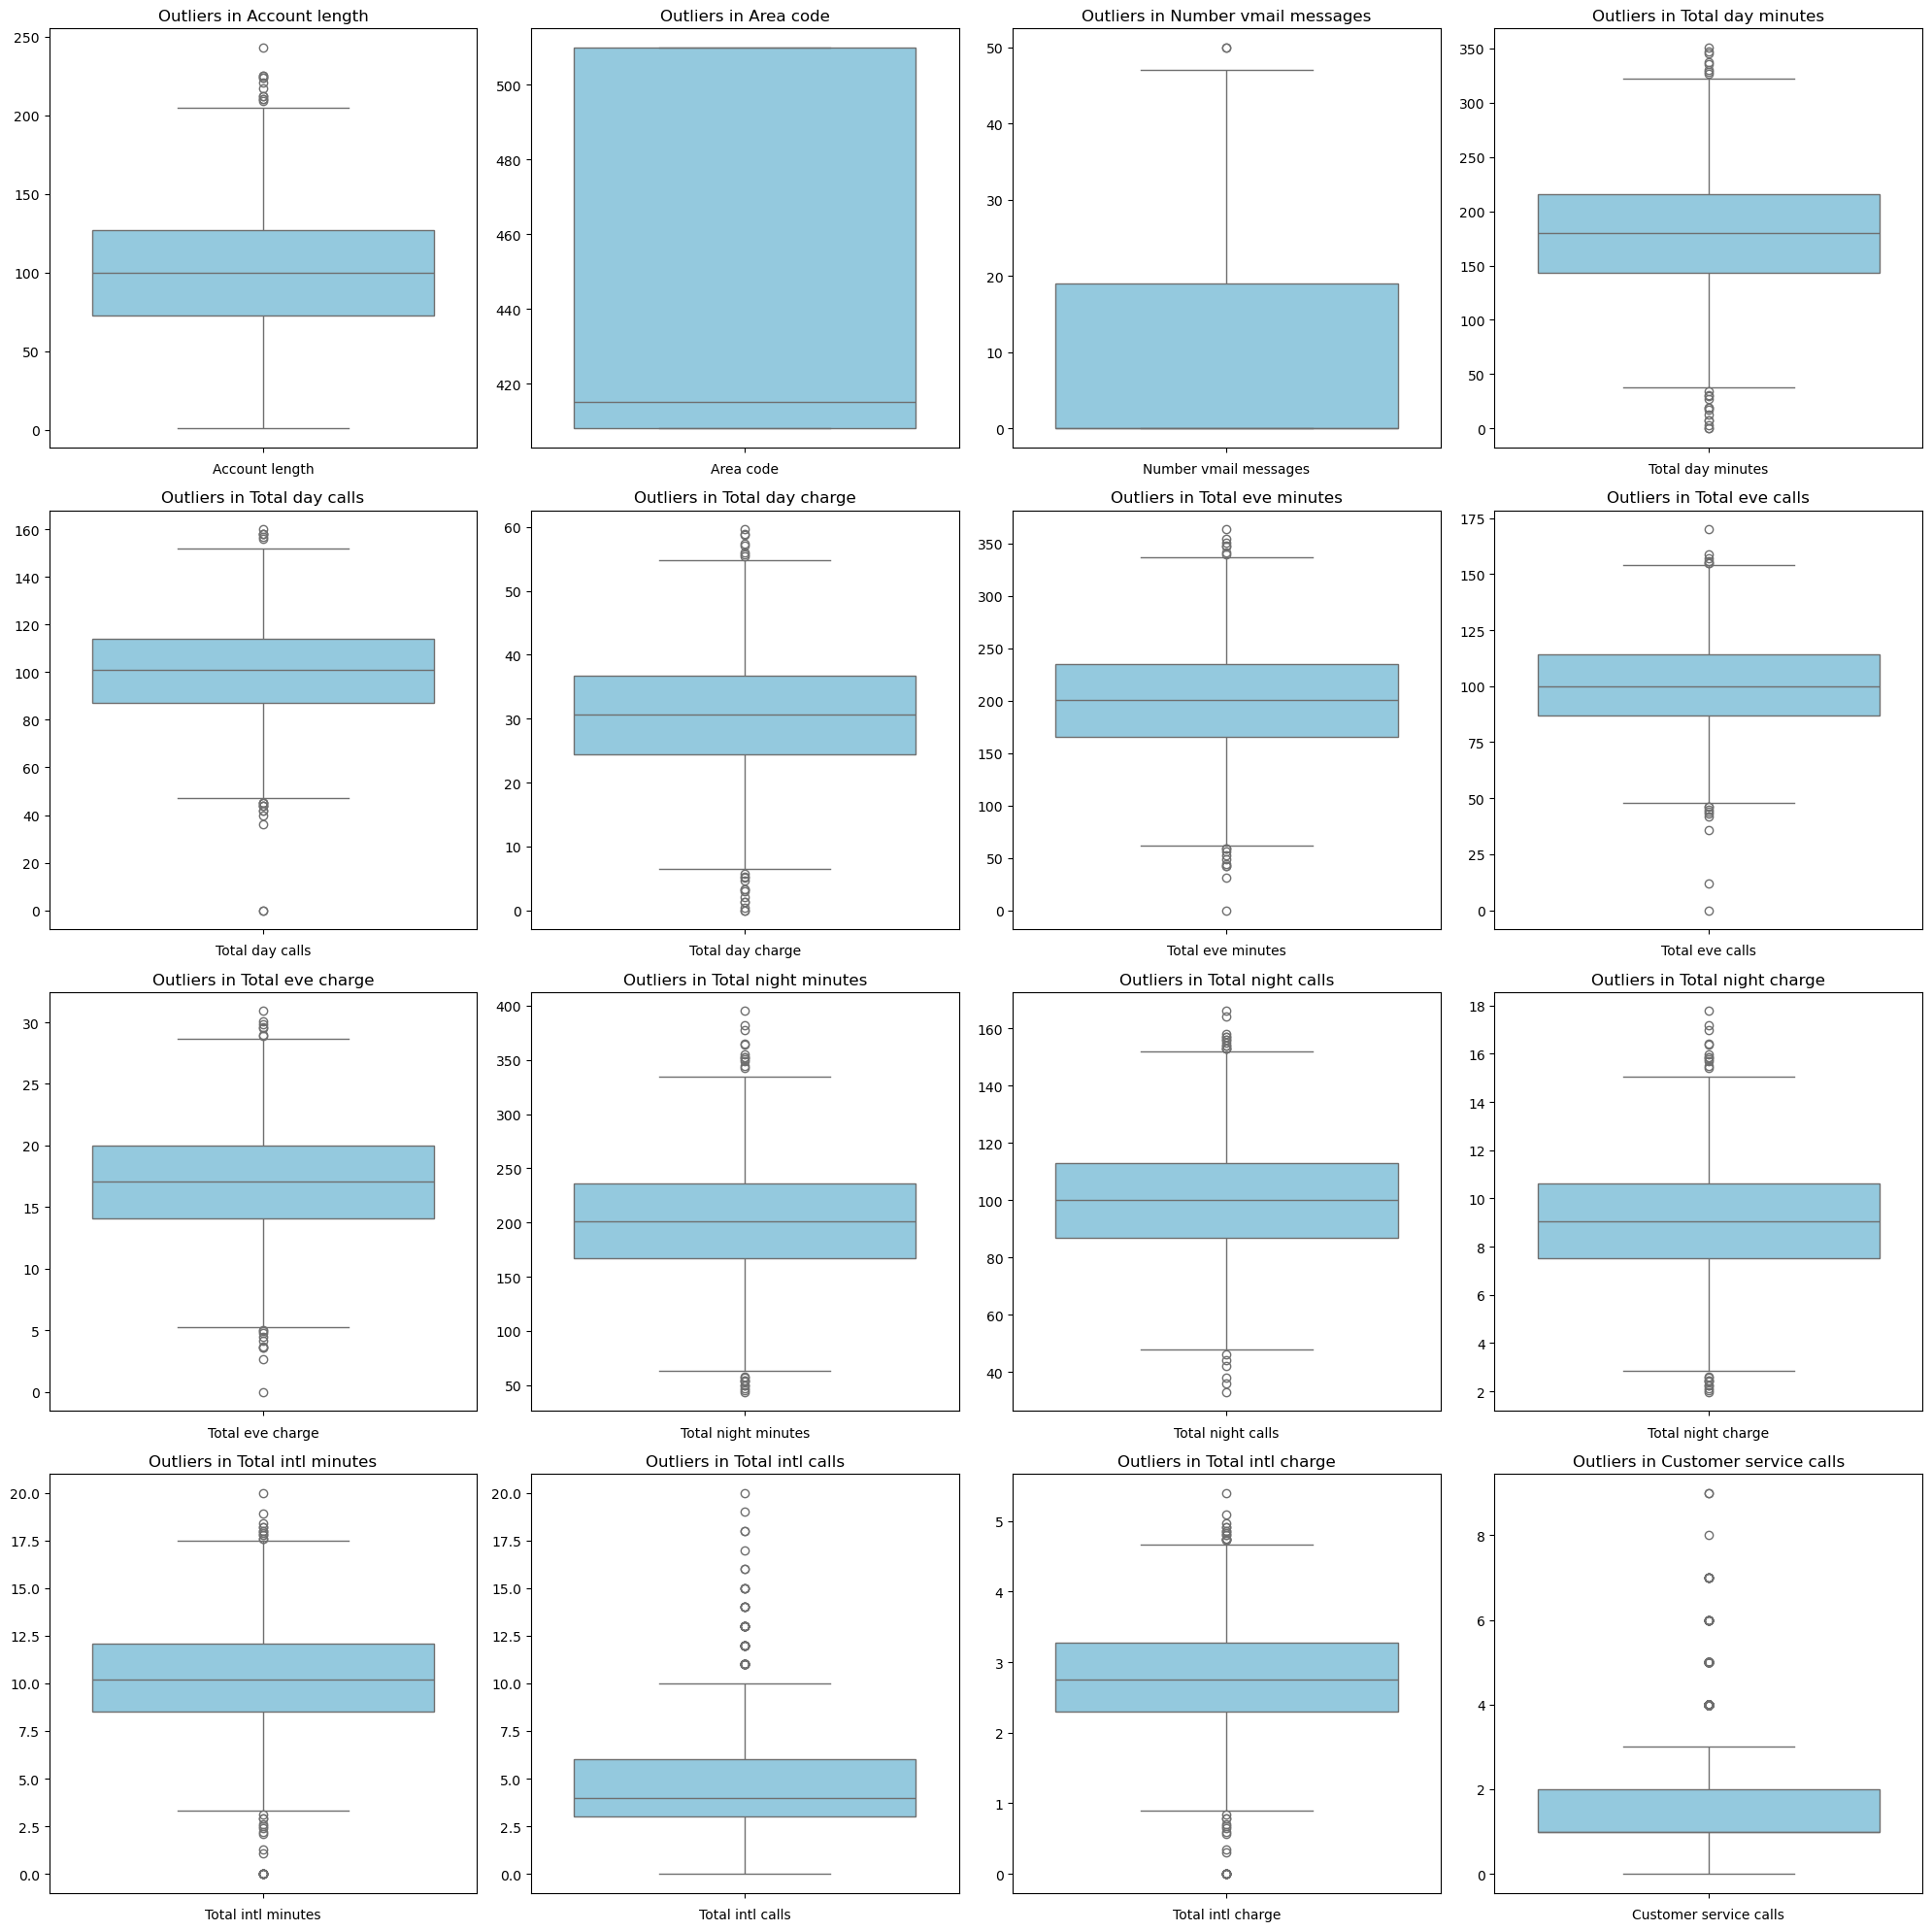

In [160]:
# Détection des outliers avec une grille de boxplots pour chaque caractéristique numérique
import math

cols = 4
num_features = train_data.select_dtypes(include=['float64', 'int64']).columns
rows = math.ceil(len(num_features) / cols)

plt.figure(figsize=(cols * 5, rows * 5))
for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=train_data[feature], color='skyblue')
    plt.title(f'Outliers in {feature}')
    plt.ylabel('')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [161]:
# Treat outliers for all features using the IQR method
def treat_outliers(train_data):
    # Iterate over numerical columns
    for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the calculated bounds
        train_data[col] = train_data[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
        
    return train_data

# Apply the function to the dataframe (train_data)
train_data = treat_outliers(train_data)

# Display the first few rows of the dataframe to verify the changes
train_data.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,OH,107.0,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,NJ,137.0,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,OH,84.0,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,False
4,OK,75.0,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [162]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical features
cat_features = train_data.select_dtypes(include=['object', 'bool']).columns
print(f"Categorical Features Detected: {cat_features}")

# Step 2: Apply Label Encoding to each categorical feature
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

# Create a copy of the transformed data for verification
train_data_encoded = train_data.copy()

# Display the first few rows of the encoded DataFrame
train_data_encoded.head()


Categorical Features Detected: Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128.0,415,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,35,107.0,415,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,31,137.0,415,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,35,84.0,408,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,36,75.0,415,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0


In [163]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les données
normalized = scaler.fit_transform(train_data_encoded)

# Convertir le résultat en DataFrame pour une meilleure lisibilité
normalized_df = pd.DataFrame(normalized, columns=train_data_encoded.columns)

# Afficher les premières lignes du DataFrame normalisé
normalized_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.32,0.613527,0.068627,0.0,1.0,0.526316,0.794655,0.587963,0.794846,0.489971,0.486111,0.490093,0.654565,0.413462,0.654576,0.479167,0.285714,0.478093,0.285714,0.0
1,0.70,0.512077,0.068627,0.0,1.0,0.547368,0.437759,0.708333,0.437703,0.483166,0.523148,0.483347,0.689432,0.528846,0.689748,0.736111,0.285714,0.735825,0.285714,0.0
2,0.62,0.657005,0.068627,0.0,0.0,0.000000,0.719828,0.625000,0.719968,0.217049,0.587963,0.216906,0.359454,0.538462,0.359612,0.631944,0.476190,0.630155,0.000000,0.0
3,0.70,0.400966,0.000000,1.0,0.0,0.000000,0.912931,0.226852,0.913149,0.004656,0.384259,0.004427,0.482746,0.394231,0.482714,0.243056,0.666667,0.240979,0.571429,0.0
4,0.72,0.357488,0.068627,1.0,0.0,0.000000,0.455345,0.615741,0.455357,0.314112,0.699074,0.314292,0.446801,0.701923,0.446743,0.486111,0.285714,0.485825,0.857143,0.0


In [164]:
# Calculer la corrélation de Pearson entre toutes les caractéristiques numériques
correlation_matrix = normalized_df.corr(method='pearson')


# Créer un tableau des paires de caractéristiques avec leur corrélation
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filtrer les paires de caractéristiques ayant une forte corrélation (par exemple, seuil > 0.😎
# Évitez de tenir compte de la corrélation d'une caractéristique avec elle-même (ce qui donnerait toujours 1)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Exclure les paires avec une corrélation parfaite

# Sélectionner les paires ayant une corrélation supérieure à un seuil, par exemple 0.8
high_correlation = correlation_pairs[correlation_pairs > 0.8]

print("\nPaires de caractéristiques fortement corrélées :")
print(high_correlation)

# Supposons que vous vouliez supprimer l'une des variables d'une paire fortement corrélée :
# Par exemple, nous pourrions supprimer une variable parmi celles ayant une corrélation > 0.8

# Création de la liste des caractéristiques à supprimer
features_to_drop = set()
for index, value in high_correlation.items():
    feature1, feature2 = index
    # Ajouter une des deux caractéristiques fortement corrélées à la liste des caractéristiques à supprimer
    features_to_drop.add(feature2)  # Supprimer feature2 par exemple

# Supprimer les caractéristiques fortement corrélées
df1_selected = normalized_df.drop(columns=features_to_drop)

# Afficher les premières lignes du DataFrame après la suppression des caractéristiques
df1_selected.head()


Paires de caractéristiques fortement corrélées :
Total day charge       Total day minutes        1.000000
Total day minutes      Total day charge         1.000000
Total eve minutes      Total eve charge         1.000000
Total eve charge       Total eve minutes        1.000000
Total night minutes    Total night charge       0.999999
Total night charge     Total night minutes      0.999999
Total intl charge      Total intl minutes       0.999992
Total intl minutes     Total intl charge        0.999992
Voice mail plan        Number vmail messages    0.957330
Number vmail messages  Voice mail plan          0.957330
dtype: float64


,State,Account length,Area code,International plan,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls,Churn
0,0.32,0.613527,0.068627,0.0,0.587963,0.486111,0.413462,0.285714,0.285714,0.0
1,0.70,0.512077,0.068627,0.0,0.708333,0.523148,0.528846,0.285714,0.285714,0.0
2,0.62,0.657005,0.068627,0.0,0.625000,0.587963,0.538462,0.476190,0.000000,0.0
3,0.70,0.400966,0.000000,1.0,0.226852,0.384259,0.394231,0.666667,0.571429,0.0
4,0.72,0.357488,0.068627,1.0,0.615741,0.699074,0.701923,0.285714,0.857143,0.0


In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer  

# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes :")
print(test_data.isnull().sum())

# Remplir les valeurs manquantes (imputation)
# Par exemple, pour les variables numériques, remplacer par la médiane
num_features = test_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
test_data[num_features] = imputer.fit_transform(test_data[num_features])

# Pour les variables catégoriques, remplacer par la valeur la plus fréquente
cat_features = test_data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
test_data[cat_features] = imputer_cat.fit_transform(test_data[cat_features])

# Vérification après imputation
print("\nNombre de lignes et colonnes avant suppression des doublons :")
print(test_data.shape)

# Suppression des colonnes dupliquées (basées sur les noms ou les valeurs identiques)
test_data = test_data.loc[:, ~test_data.columns.duplicated()]  # Supprimer les colonnes dupliquées par nom

# Vérification des colonnes identiques (basé sur les valeurs)
test_data = test_data.loc[:, ~test_data.T.duplicated()]  # Supprimer les colonnes avec des valeurs identiques

# Suppression des lignes dupliquées
test_data = test_data.drop_duplicates()

# Vérification après suppression
print("\nNombre de lignes et colonnes après suppression des doublons :")
print(test_data.shape)

# Étape 1: Identifier les variables catégoriques
cat_features_2 = test_data.select_dtypes(include=['object', 'bool']).columns
print(f"Caractéristiques catégoriques détectées: {cat_features_2}")

# Étape 2: Appliquer l'encodage LabelEncoder
label_encoders = {}
for col in cat_features_2:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    label_encoders[col] = le

# Afficher les premières lignes du DataFrame transformé
print("\nDataFrame après encodage des variables catégoriques:")
print(test_data.head())

# Normaliser les données
print("\nNormalisation des données:")

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les données
normalized = scaler.fit_transform(test_data)

# Convertir le résultat en DataFrame pour une meilleure lisibilité
normalized_df_2 = pd.DataFrame(normalized, columns=test_data.columns)

# Afficher les premières lignes du DataFrame normalisé
print(normalized_df_2.head())


Vérification des valeurs manquantes :
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Nombre de lignes et colonnes avant suppression des doublons :
(667, 20)

Nombre de lignes et colonnes après suppression des doublons :
(667, 20)
Caractéristiques catégoriques détectées: Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')

DataFrame après encodage des variables catégoriques:
   State  Account length  Area code  International plan  Voice ma

# <font color='red'> Modeling</font>

In [166]:
# Séparer les caractéristiques (X) et la cible (y) pour l'ensemble d'entraînement
X_train = normalized_df.drop(columns=['Churn'])  # Features for training
y_train = normalized_df['Churn']  # Target for training

# Séparer les caractéristiques (X) et la cible (y) pour l'ensemble de test
X_test = normalized_df_2.drop(columns=['Churn'])  # Features for test
y_test = normalized_df_2['Churn']  # Target for test


Distribution de la variable cible 'Churn' dans l'ensemble d'entraînement :
Churn
0.0    2278
1.0     388
Name: count, dtype: int64


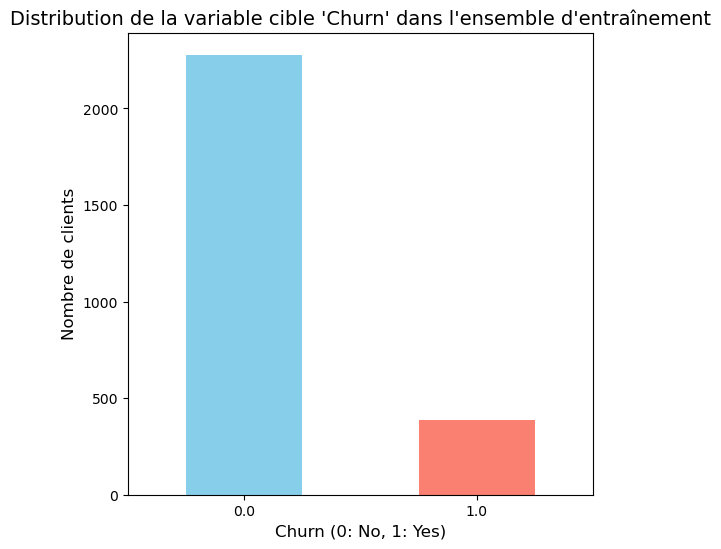

In [167]:
# Compter les valeurs de la variable cible 'Churn' dans l'ensemble d'entraînement
churn_counts_train = y_train.value_counts()
print("Distribution de la variable cible 'Churn' dans l'ensemble d'entraînement :")
print(churn_counts_train)

# Visualiser la distribution avec un graphique en barres
y_train.value_counts().plot(kind='bar', figsize=(6, 6), color=['skyblue', 'salmon'])
plt.title("Distribution de la variable cible 'Churn' dans l'ensemble d'entraînement", fontsize=14)
plt.xlabel("Churn (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Nombre de clients", fontsize=12)
plt.xticks(rotation=0)  # Maintenir les labels de l'axe X à l'horizontale
plt.show()


<Axes: xlabel='Churn'>

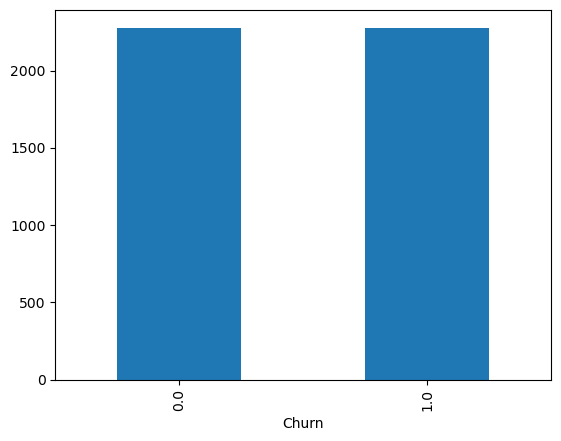

In [168]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 42) 

X_smote, y_smote = smote.fit_resample(X_train,y_train)
y_smote.value_counts().plot.bar()


<h1>DECISION TREE </h1>


In [206]:
# Importation des bibliothèques nécessaires
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Initialisation du modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42 , class_weight='balanced')

# Entraînement du modèle
dt_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred = dt_model.predict(X_test)

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Création d'un dictionnaire avec les résultats
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

# Conversion du dictionnaire en DataFrame pour un affichage sous forme de tableau
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Affichage du tableau
print(metrics_df)

# Rapport de classification pour la régression logistique
print("\nRapport de classification - Régression logistique :\n", classification_report(y_test, y_pred))

      Metric     Value
0   Accuracy  0.794603
1  Precision  0.361842
2     Recall  0.578947
3   F1-Score  0.445344
4    ROC-AUC  0.704683

Rapport de classification - Régression logistique :
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       572
         1.0       0.36      0.58      0.45        95

    accuracy                           0.79       667
   macro avg       0.64      0.70      0.66       667
weighted avg       0.84      0.79      0.81       667



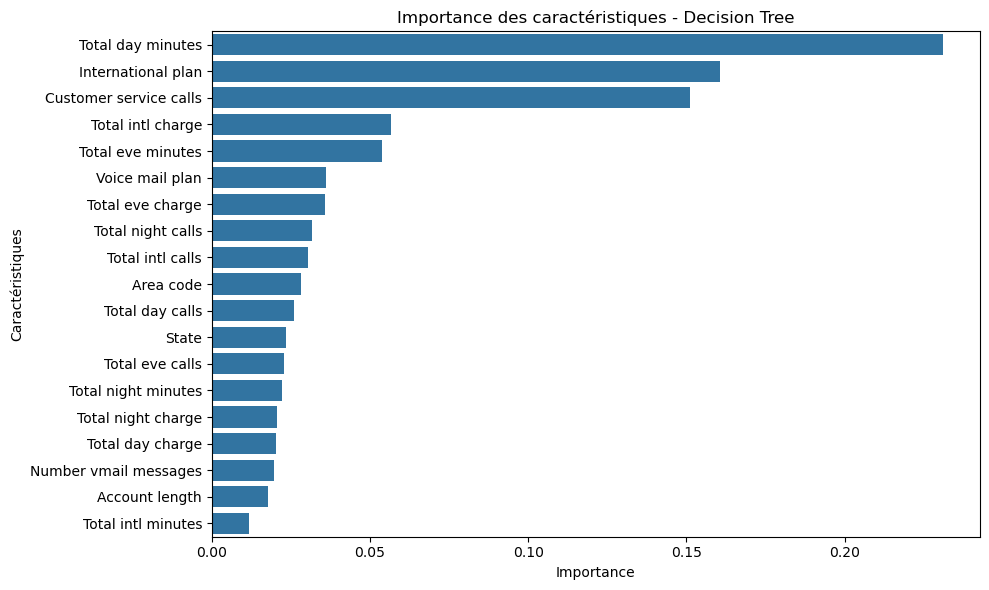

In [170]:
# Ensure X_train is a DataFrame and has column names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    # Ensure X_train is a DataFrame and has column names
    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns
    else:
        # Replace this with the actual column names or infer them
        feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]  # Create column names based on the number of features
        X_train = pd.DataFrame(X_train, columns=feature_names)
    # Replace this with the actual column names or infer them
    feature_names = [f'feature{i+1}' for i in range(X_train.shape[1])]  # Create column names based on the number of features
    X_train = pd.DataFrame(X_train, columns=feature_names)

# Compute feature importance
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=feature_names)
feature_importance_dt = feature_importance_dt.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt.values, y=feature_importance_dt.index, orient="h")  # Horizontal bar plot for readability
plt.title('Importance des caractéristiques - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

<h1>Random Forest</h1>

In [207]:
# Entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42 , max_depth=3)

# Entraînement du modèle
rf_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred_rf = rf_model.predict(X_test)

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# Création d'un dictionnaire avec les résultats
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}

# Conversion du dictionnaire en DataFrame pour un affichage sous forme de tableau
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Affichage du tableau
print(metrics_df)

# Rapport de classification pour la régression logistique
print("\nRapport de classification - Régression logistique :\n", classification_report(y_test, y_pred_rf))



      Metric     Value
0   Accuracy  0.859070
1  Precision  0.504950
2     Recall  0.536842
3   F1-Score  0.520408
4    ROC-AUC  0.704683

Rapport de classification - Régression logistique :
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       572
         1.0       0.50      0.54      0.52        95

    accuracy                           0.86       667
   macro avg       0.71      0.72      0.72       667
weighted avg       0.86      0.86      0.86       667



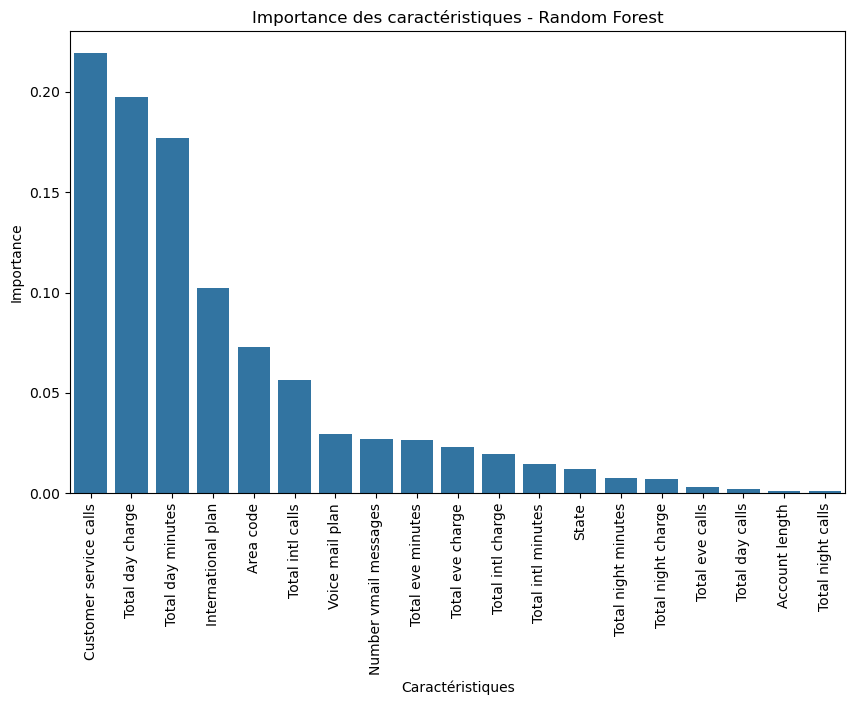

In [172]:
# Importance des caractéristiques
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf.index, y=feature_importance_rf.values)
plt.title('Importance des caractéristiques - Random Forest')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# SVM

In [208]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt


# Entraînement du modèle SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, zero_division=1)
recall = recall_score(y_test, y_pred_svm, zero_division=1)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_prob_svm)

# Affichage des résultats sous forme de tableau
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("\nMatrice de confusion :\n", conf_matrix)

# Rapport de classification pour la régression logistique
print("\nRapport de classification - Régression logistique :\n", classification_report(y_test, y_pred_svm))



      Metric     Value
0   Accuracy  0.865067
1  Precision  0.521739
2     Recall  0.631579
3   F1-Score  0.571429
4    ROC-AUC  0.845491

Matrice de confusion :
 [[517  55]
 [ 35  60]]

Rapport de classification - Régression logistique :
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       572
         1.0       0.52      0.63      0.57        95

    accuracy                           0.87       667
   macro avg       0.73      0.77      0.75       667
weighted avg       0.88      0.87      0.87       667



# GradientBoosting

      Metric     Value
0   Accuracy  0.670165
1  Precision  0.262357
2     Recall  0.726316
3   F1-Score  0.385475
4    ROC-AUC  0.795547

Matrice de confusion - GBM :
 [[378 194]
 [ 26  69]]

Rapport de classification - GBM :
               precision    recall  f1-score   support

         0.0       0.94      0.66      0.77       572
         1.0       0.26      0.73      0.39        95

    accuracy                           0.67       667
   macro avg       0.60      0.69      0.58       667
weighted avg       0.84      0.67      0.72       667



C:\Users\SHAMS\AppData\Local\Temp\ipykernel_20036\2860907155.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_gbm.index, y=feature_importance_gbm.values, palette="viridis")


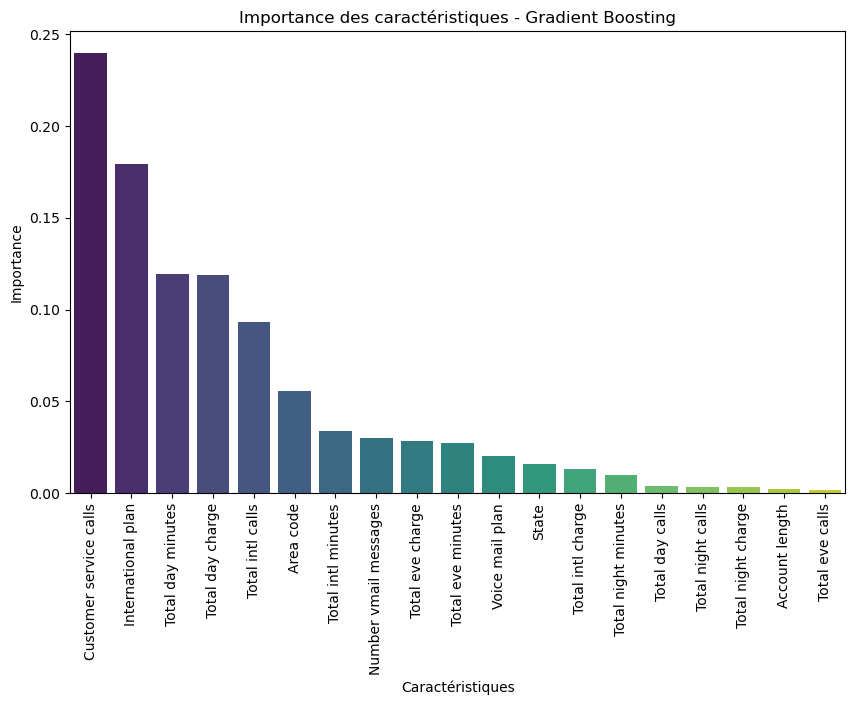

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

# Entraînement du modèle Gradient Boosting (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred_gbm = gbm_model.predict(X_test)
y_pred_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation pour GBM
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_prob_gbm)

# Affichage des résultats sous forme de tableau
metrics_gbm = {
    'Accuracy': accuracy_gbm,
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1-Score': f1_gbm,
    'ROC-AUC': roc_auc_gbm
}
metrics_gbm_df = pd.DataFrame(list(metrics_gbm.items()), columns=['Metric', 'Value'])
print(metrics_gbm_df)

# Affichage de la matrice de confusion pour GBM
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("\nMatrice de confusion - GBM :\n", conf_matrix_gbm)

# Rapport de classification pour GBM
print("\nRapport de classification - GBM :\n", classification_report(y_test, y_pred_gbm))

# Visualisation de l'importance des caractéristiques
feature_importance_gbm = pd.Series(gbm_model.feature_importances_, index=X_smote.columns)
feature_importance_gbm = feature_importance_gbm.sort_values(ascending=False)

# Visualisation avec un graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_gbm.index, y=feature_importance_gbm.values, palette="viridis")
plt.title('Importance des caractéristiques - Gradient Boosting')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


# LogisticRegression

In [205]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle de régression logistique
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation pour la régression logistique
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Affichage des résultats sous forme de tableau
metrics_lr = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'ROC-AUC': roc_auc_lr
}
metrics_lr_df = pd.DataFrame(list(metrics_lr.items()), columns=['Metric', 'Value'])
print(metrics_lr_df)

# Affichage de la matrice de confusion pour la régression logistique
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatrice de confusion - Régression logistique :\n", conf_matrix_lr)

# Rapport de classification pour la régression logistique
print("\nRapport de classification - Régression logistique :\n", classification_report(y_test, y_pred_lr))

      Metric     Value
0   Accuracy  0.811094
1  Precision  0.400000
2     Recall  0.652632
3   F1-Score  0.496000
4    ROC-AUC  0.810692

Matrice de confusion - Régression logistique :
 [[479  93]
 [ 33  62]]

Rapport de classification - Régression logistique :
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.88       572
         1.0       0.40      0.65      0.50        95

    accuracy                           0.81       667
   macro avg       0.67      0.75      0.69       667
weighted avg       0.86      0.81      0.83       667



# neural_network

In [210]:
from sklearn.neural_network import MLPClassifier

# Entraînement du modèle MLP Classifier (réseau de neurones)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),  # Taille des couches cachées
                          activation='relu',          # Fonction d'activation
                          solver='adam',              # Méthode d'optimisation
                          random_state=42,
                          max_iter=500)               # Nombre maximal d'itérations
mlp_model.fit(X_smote, y_smote)

# Prédictions sur le jeu de test
y_pred_mlp = mlp_model.predict(X_test)
y_pred_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Calcul des métriques d'évaluation pour le réseau de neurones
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_prob_mlp)

# Affichage des résultats sous forme de tableau
metrics_mlp = {
    'Accuracy': accuracy_mlp,
    'Precision': precision_mlp,
    'Recall': recall_mlp,
    'F1-Score': f1_mlp,
    'ROC-AUC': roc_auc_mlp
}
metrics_mlp_df = pd.DataFrame(list(metrics_mlp.items()), columns=['Metric', 'Value'])
print(metrics_mlp_df)

# Affichage de la matrice de confusion pour MLPClassifier
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("\nMatrice de confusion - MLPClassifier :\n", conf_matrix_mlp)

# Rapport de classification pour MLPClassifier
print("\nRapport de classification - MLPClassifier :\n", classification_report(y_test, y_pred_mlp))



      Metric     Value
0   Accuracy  0.863568
1  Precision  0.518519
2     Recall  0.589474
3   F1-Score  0.551724
4    ROC-AUC  0.803368

Matrice de confusion - MLPClassifier :
 [[520  52]
 [ 39  56]]

Rapport de classification - MLPClassifier :
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       572
         1.0       0.52      0.59      0.55        95

    accuracy                           0.86       667
   macro avg       0.72      0.75      0.74       667
weighted avg       0.87      0.86      0.87       667



c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [220]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd

# Initialiser le modèle KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Entraîner le modèle KNN sur les données SMOTE
knn.fit(X_smote, y_smote)

# Prédictions sur les données de test
y_pred_knn = knn.predict(X_test)

# Calcul des métriques d'évaluation pour le modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Affichage des résultats sous forme de tableau
metrics_knn = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn,
    'ROC-AUC': roc_auc_knn
}
metrics_knn_df = pd.DataFrame(list(metrics_knn.items()), columns=['Metric', 'Value'])
print(metrics_knn_df)

# Affichage de la matrice de confusion pour KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nMatrice de confusion - KNN Classifier :\n", conf_matrix_knn)

# Rapport de classification pour KNN
print("\nRapport de classification - KNN Classifier :\n", classification_report(y_test, y_pred_knn))


      Metric     Value
0   Accuracy  0.775112
1  Precision  0.352941
2     Recall  0.694737
3   F1-Score  0.468085
4    ROC-AUC  0.776123

Matrice de confusion - KNN Classifier :
 [[451 121]
 [ 29  66]]

Rapport de classification - KNN Classifier :
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86       572
         1.0       0.35      0.69      0.47        95

    accuracy                           0.78       667
   macro avg       0.65      0.74      0.66       667
weighted avg       0.86      0.78      0.80       667



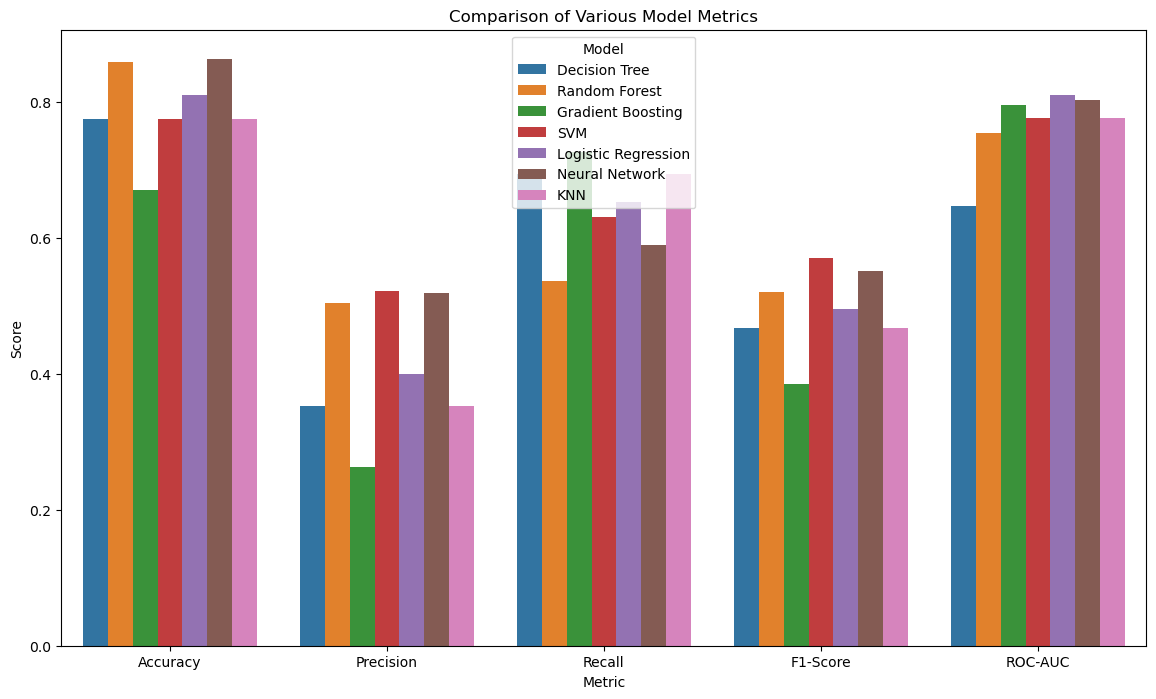

In [222]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Ajouter les métriques des autres modèles
metrics_comparison['Gradient Boosting'] = [accuracy_gbm, precision_gbm, recall_gbm, f1_gbm, roc_auc_gbm]
metrics_comparison['SVM'] = [accuracy, precision, recall, f1, roc_auc]
metrics_comparison['Logistic Regression'] = [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]
metrics_comparison['Neural Network'] = [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp]
metrics_comparison['KNN'] = [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]

# Convertir le DataFrame en format long pour seaborn
metrics_comparison_long = pd.melt(metrics_comparison, id_vars=['Metric'], var_name='Model', value_name='Score')

# Créer le barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_comparison_long)
plt.title('Comparison of Various Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()

c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\SHAMS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X 

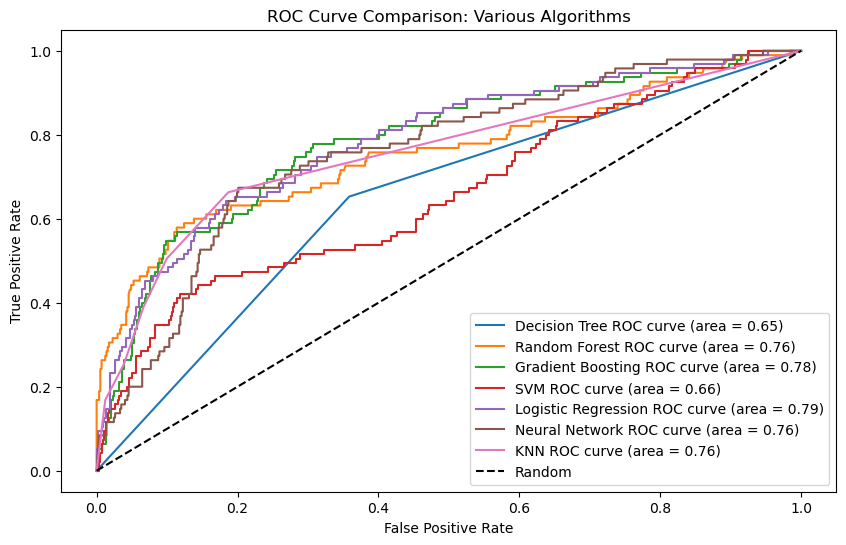

In [224]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Evaluate Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Evaluate Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Evaluate Gradient Boosting
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, gbm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Evaluate SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Evaluate Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Evaluate Neural Network
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Evaluate KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_gbm)
plt.plot(fpr_svm, tpr_svm, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_mlp, tpr_mlp, label='Neural Network ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)

# Random Line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Various Algorithms')
plt.legend(loc='best')
plt.show()

In [226]:
# Résumé des performances des différents modèles
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [accuracy, precision, recall, f1, roc_auc_dt],
    'Random Forest': [accuracy, precision, recall, f1, roc_auc_rf],
    'Gradient Boosting': [accuracy_gbm, precision_gbm, recall_gbm, f1_gbm, roc_auc_gbm],
    'SVM': [accuracy, precision, recall, f1, roc_auc_svm],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr],
    'Neural Network': [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp, roc_auc_mlp],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn]
})

# Affichage des résultats
print(metrics_comparison)

# Conclusion
best_model = metrics_comparison.set_index('Metric').idxmax(axis=1)
print("\nMeilleur modèle selon chaque métrique :")
print(best_model)

      Metric  Decision Tree  Random Forest  Gradient Boosting       SVM  \
0   Accuracy       0.775112       0.775112           0.670165  0.775112   
1  Precision       0.521739       0.521739           0.262357  0.521739   
2     Recall       0.631579       0.631579           0.726316  0.631579   
3   F1-Score       0.571429       0.571429           0.385475  0.571429   
4    ROC-AUC       0.647120       0.755282           0.784229  0.655962   

   Logistic Regression  Neural Network       KNN  
0             0.811094        0.863568  0.775112  
1             0.400000        0.518519  0.352941  
2             0.652632        0.589474  0.694737  
3             0.496000        0.551724  0.468085  
4             0.785959        0.758539  0.757481  

Meilleur modèle selon chaque métrique :
Metric
Accuracy          Neural Network
Precision          Decision Tree
Recall         Gradient Boosting
F1-Score           Decision Tree
ROC-AUC      Logistic Regression
dtype: object
